# Goal:



*   Predict whether a person is introverted or extroverted based on certain characteristics.




# Pre-Reqs:

In [ ]:
#################################################################################Imports##########################################################################
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from collections import Counter

# Data:

In [ ]:
#################################################################################Data Frames##########################################################################

#Creating datframe from test and train csv's
TrainDataset = pd.read_csv('/content/train.csv')
TestDataset = pd.read_csv('/content/test.csv')

#Creating some additional dataframes to not be encoded
TrainNoEncDataset = pd.read_csv('/content/train.csv')
TestNoEncDataset = pd.read_csv('/content/test.csv')


In [ ]:
TrainNoEncDataset.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [ ]:
TestNoEncDataset.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


# Data-Cleanup:

In [ ]:
TrainDataset.isnull().sum()

,0
id,0
Time_spent_Alone,1190
Stage_fear,1893
Social_event_attendance,1180
Going_outside,1466
Drained_after_socializing,1149
Friends_circle_size,1054
Post_frequency,1264
Personality,0


In [ ]:
TestDataset.isnull().sum()

,0
id,0
Time_spent_Alone,425
Stage_fear,598
Social_event_attendance,397
Going_outside,466
Drained_after_socializing,432
Friends_circle_size,350
Post_frequency,408


In [ ]:
########################################################################Encoding############################################################################

le = LabelEncoder()

####################################################################TrainDataset

############################Stage fear
TrainDataset['Stage_fear'] = le.fit_transform(TrainDataset['Stage_fear'])
############################Drianed after socialising
TrainDataset['Drained_after_socializing'] = le.fit_transform(TrainDataset['Drained_after_socializing'])
############################Post frequency
TrainDataset['Post_frequency'] = le.fit_transform(TrainDataset['Post_frequency'])
#For the model
TrainDataset['Personality'] = le.fit_transform(TrainDataset['Personality'])

####################################################################TestDataset

############################Stage fear
TestDataset['Stage_fear'] = le.fit_transform(TestDataset['Stage_fear'])
############################Drianed after socialising
TestDataset['Drained_after_socializing'] = le.fit_transform(TestDataset['Drained_after_socializing'])
############################Post frequency
TestDataset['Post_frequency'] = le.fit_transform(TestDataset['Post_frequency'])

########################################################################Filling null values############################################################################

####################################################################TrainDataset

#Time spent alone
TrainDataset['Time_spent_Alone'] = TrainDataset['Time_spent_Alone'].fillna(TrainDataset['Time_spent_Alone'].mean())
#Social event attendance
TrainDataset['Social_event_attendance'] = TrainDataset['Social_event_attendance'].fillna(TrainDataset['Social_event_attendance'].mean())
#Going outside
TrainDataset['Going_outside'] = TrainDataset['Going_outside'].fillna(TrainDataset['Going_outside'].mean())
#Drained after socialising
TrainDataset['Drained_after_socializing'] = TrainDataset['Drained_after_socializing'].fillna(TrainDataset['Drained_after_socializing'].mean())
#Freinds circle size
TrainDataset['Friends_circle_size'] = TrainDataset['Friends_circle_size'].fillna(TrainDataset['Friends_circle_size'].mean())
#Post frequency
TrainDataset['Post_frequency'] = TrainDataset['Post_frequency'].fillna(TrainDataset['Post_frequency'].mean())

####################################################################TestDataset

#Time spent alone
TestDataset['Time_spent_Alone'] = TestDataset['Time_spent_Alone'].fillna(TestDataset['Time_spent_Alone'].mean())
#Social event attendance
TestDataset['Social_event_attendance'] = TestDataset['Social_event_attendance'].fillna(TestDataset['Social_event_attendance'].mean())
#Going outside
TestDataset['Going_outside'] = TestDataset['Going_outside'].fillna(TestDataset['Going_outside'].mean())
#Drained after socialising
TestDataset['Drained_after_socializing'] = TestDataset['Drained_after_socializing'].fillna(TestDataset['Drained_after_socializing'].mean())
#Freinds circle size
TestDataset['Friends_circle_size'] = TestDataset['Friends_circle_size'].fillna(TestDataset['Friends_circle_size'].mean())
#Post frequency
TestDataset['Post_frequency'] = TestDataset['Post_frequency'].fillna(TestDataset['Post_frequency'].mean())

#####################################################################Null Check
TrainNoNulls = TrainDataset.applymap(lambda x: pd.notnull(x)).all().all()
print(f"Train Dataset not null? {TrainNoNulls}")
TestNoNulls = TestDataset.applymap(lambda x: pd.notnull(x)).all().all()
print(f"Test Dataset not null? {TestNoNulls}")
####################################################################Numeric Check
Train_Numerical = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()
print(f"Test Dataset Numerical? {Train_Numerical}")
Test_Numerical = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()
print(f"Test Dataset Numerical? {Test_Numerical}")


Train Dataset not null? True
Test Dataset not null? True
Test Dataset Numerical? True
Test Dataset Numerical? True


/tmp/ipython-input-7-4202108390.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TrainNoNulls = TrainDataset.applymap(lambda x: pd.notnull(x)).all().all()
/tmp/ipython-input-7-4202108390.py:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TestNoNulls = TestDataset.applymap(lambda x: pd.notnull(x)).all().all()
/tmp/ipython-input-7-4202108390.py:63: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Train_Numerical = TrainDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()
/tmp/ipython-input-7-4202108390.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Test_Numerical = TestDataset.applymap(lambda x: isinstance(x, (int, float))).all().all()


# Data Analysis:

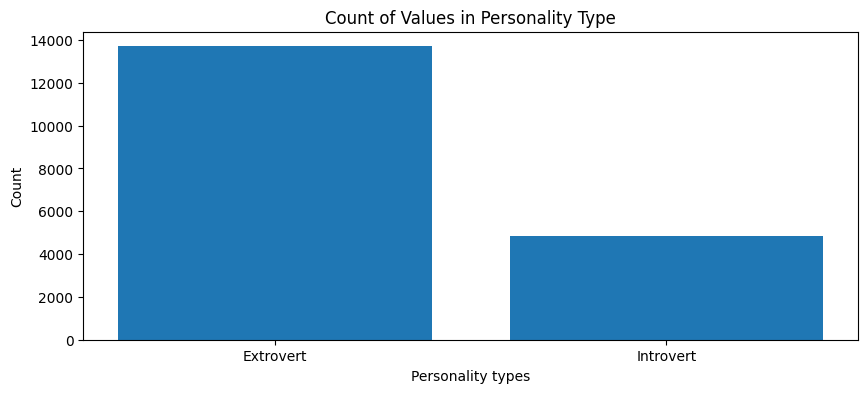

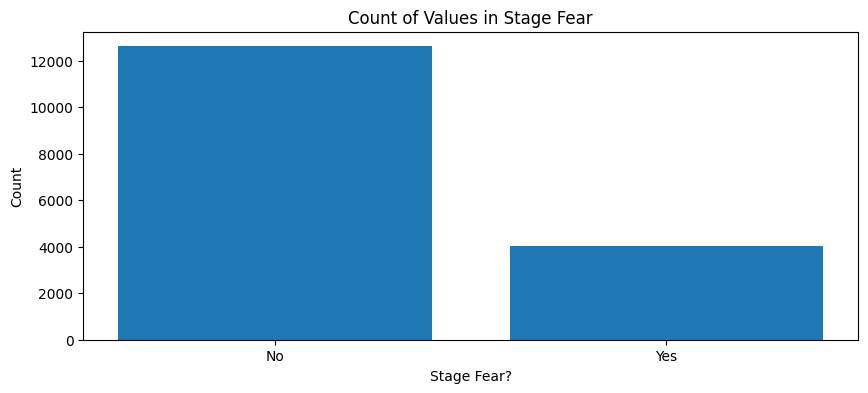

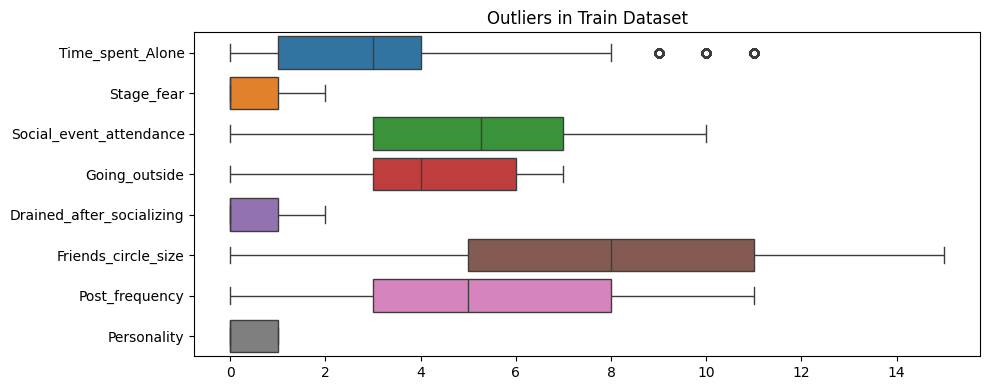

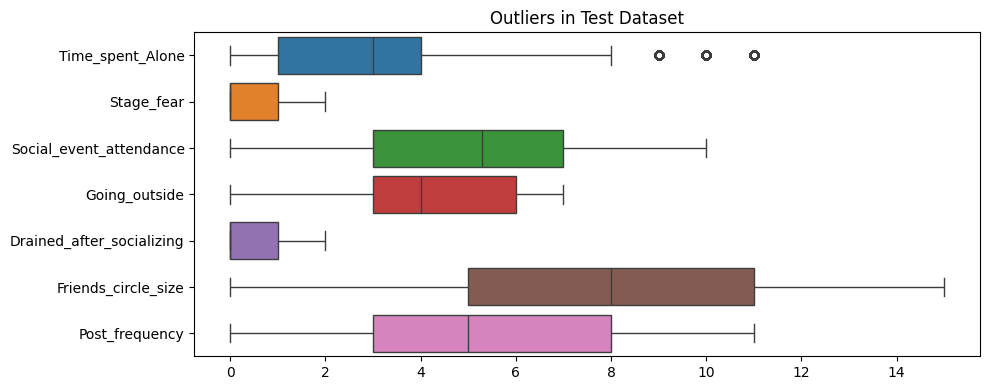

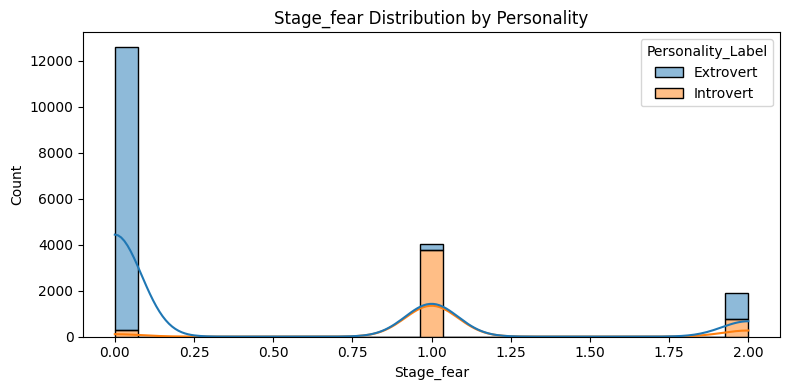

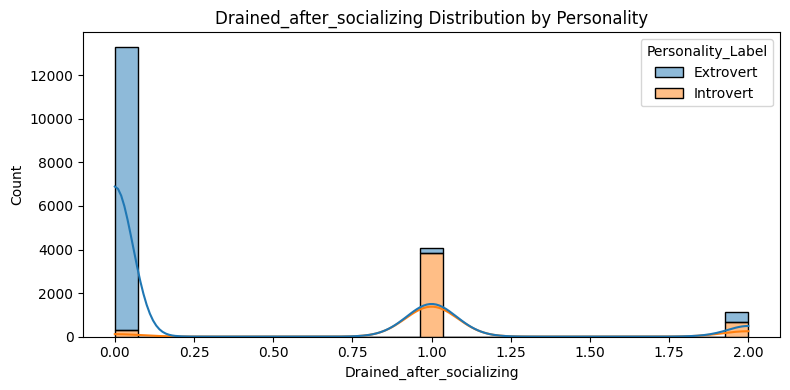

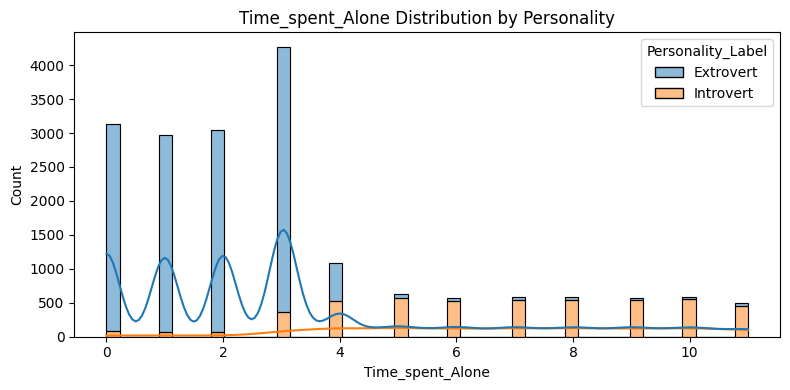

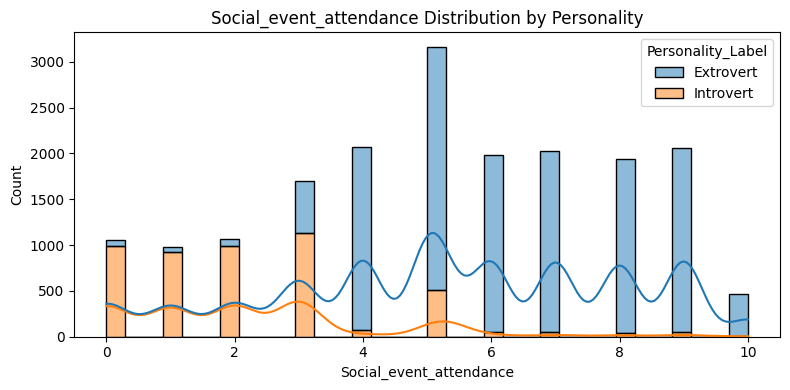

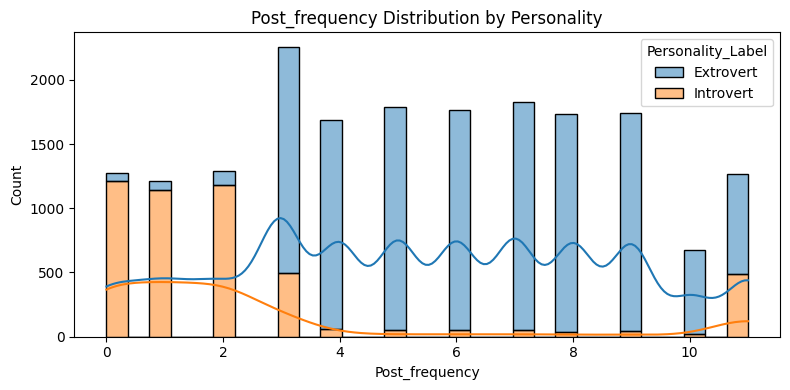

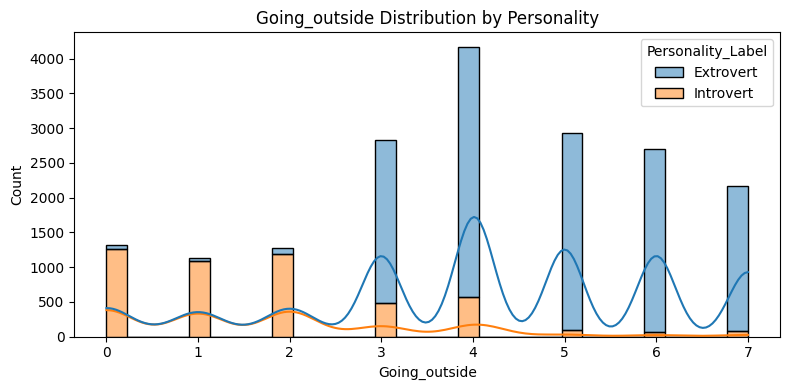

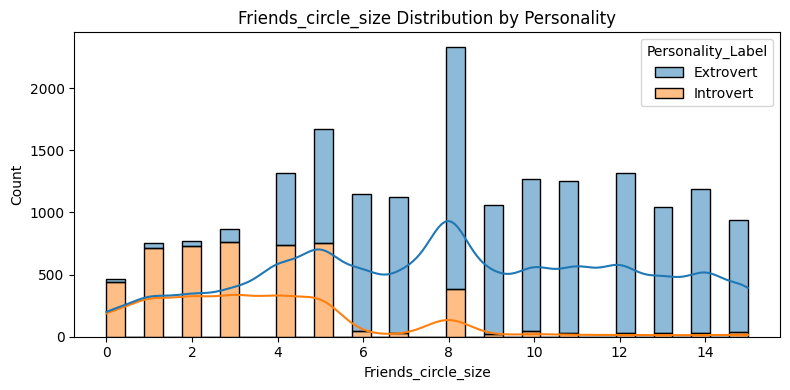

In [ ]:
#Counts of intro vs extro
CountsOfCrop = TrainNoEncDataset['Personality'].value_counts()
plt.figure(figsize=(10, 4))
# Plot bar chart
plt.bar(CountsOfCrop.index, CountsOfCrop.values)
plt.xlabel('Personality types')
plt.ylabel('Count')
plt.title('Count of Values in Personality Type')

#Counts of stage fear
CountsOfCrop = TrainNoEncDataset['Stage_fear'].value_counts()
plt.figure(figsize=(10, 4))
# Plot bar chart
plt.bar(CountsOfCrop.index, CountsOfCrop.values)
plt.xlabel('Stage Fear?')
plt.ylabel('Count')
plt.title('Count of Values in Stage Fear')

#Check for outliers in traindataset

numeric_cols = TrainDataset.select_dtypes(include='number').drop(columns=['id'])

# Create box plots for all numeric columns
plt.figure(figsize=(10, 4))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Outliers in Train Dataset')
plt.tight_layout()

#Check for outliers in testdataset

numeric_cols = TestDataset.select_dtypes(include='number').drop(columns=['id'])

# Create box plots for all numeric columns
plt.figure(figsize=(10, 4))
sns.boxplot(data=numeric_cols, orient='h')
plt.title('Outliers in Test Dataset')
plt.tight_layout()

# Map to labels for clarity
TrainDataset['Personality_Label'] = TrainDataset['Personality'].map({0: 'Extrovert', 1: 'Introvert'})

# List of features to plot
features = ['Stage_fear', 'Drained_after_socializing', 'Time_spent_Alone',
            'Social_event_attendance', 'Post_frequency', 'Going_outside', 'Friends_circle_size']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=TrainDataset, x=feature, hue='Personality_Label', kde=True, multiple='stack')
    plt.title(f'{feature} Distribution by Personality')
    plt.tight_layout()
    plt.show()

plt.show()

# Feature Engineering:

In [ ]:
################################################################Winsorisation of extreme data:
TrainWinsorisation = winsorize(TrainDataset['Time_spent_Alone'], limits=[0.05, 0.05])
# Replace the original column if you want
TrainDataset['Time_spent_Alone'] = TrainWinsorisation

#######################################################Removing '2' (null) from Stage_fear column - this column is binary

#Using random forest to predict what personality they would be
# Split the data
knownSF = TrainDataset[TrainDataset['Stage_fear'].isin([0, 1])]
missing = TrainDataset[TrainDataset['Stage_fear'] == 2]

# Features to use for prediction
features = ['Personality', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size']

# Encode categoricals if needed
known_X = pd.get_dummies(knownSF[features], drop_first=True)
known_y = knownSF['Stage_fear']
missing_XSF = pd.get_dummies(missing[features], drop_first=True)

# Align columns
missing_XSF = missing_XSF.reindex(columns=known_X.columns, fill_value=0)

# Train a model
model = RandomForestClassifier()
model.fit(known_X, known_y)

# Predict missing values
predictedSF = model.predict(missing_XSF)

# Fill the predictions back into original dataset
TrainDataset.loc[TrainDataset['Stage_fear'] == 2, 'Stage_fear'] = predictedSF

#######################################################Removing '2' (null) from Drained_after_socializing column - this column is binary

# Separate known and missing
knownDaS = TrainDataset[TrainDataset['Drained_after_socializing'].isin([0, 1])]
missing = TrainDataset[TrainDataset['Drained_after_socializing'] == 2]

# Choose features that might help
features = ['Personality', 'Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Stage_fear', 'Friends_circle_size']

# One-hot encode categorical columns
known_X = pd.get_dummies(knownDaS[features], drop_first=True)
known_y = knownDaS['Drained_after_socializing']
missing_XDaS = pd.get_dummies(missing[features], drop_first=True)

# Align columns
missing_XDaS = missing_XDaS.reindex(columns=known_X.columns, fill_value=0)

# Train the model
model = RandomForestClassifier()
model.fit(known_X, known_y)

# Predict missing values
predictedDaS = model.predict(missing_XDaS)

# Update original dataset
TrainDataset.loc[TrainDataset['Drained_after_socializing'] == 2, 'Drained_after_socializing'] = predictedDaS

#########################################################################IQR
Q1 = TrainDataset['Time_spent_Alone'].quantile(0.25)
Q3 = TrainDataset['Time_spent_Alone'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = TrainDataset[(TrainDataset['Time_spent_Alone'] < lower_bound) | (TrainDataset['Time_spent_Alone'] > upper_bound)]
print(outliers[['id', 'Time_spent_Alone']])

TrainDataset['Outlier_Flag'] = np.where(
    (TrainDataset['Time_spent_Alone'] < lower_bound) |
    (TrainDataset['Time_spent_Alone'] > upper_bound),
    'Outlier', 'Normal'
)

#########################################################################Binning

def bin_post_frequency(x):
    if x <= 3:
        return 0  # Likely Introvert
    elif x <= 10:
        return 1  # Likely Extrovert
    else:
        return 2  # Mixed / Unclear

def bin_circle_size(x):
    if x <= 3:
        return 0  # Small
    elif x <= 7:
        return 1  # Medium
    else:
        return 2  # Large

#########################################################################Collumn Dropping

#Kaggle community saying this collumn dropped yields better results
#TestDataset = TestDataset.drop('Drained_after_socializing', axis=1)
#TrainDataset = TrainDataset.drop('Drained_after_socializing', axis=1)

#Test due to high importance on chart - see if dropping reduces dependance from model
#TestDataset = TestDataset.drop('Stage_fear', axis=1)
#TrainDataset = TrainDataset.drop('Stage_fear', axis=1)

          id  Time_spent_Alone
25        25               9.0
27        27               9.0
44        44               9.0
48        48              10.0
55        55               9.0
...      ...               ...
18441  18441              10.0
18448  18448              10.0
18449  18449               9.0
18459  18459              10.0
18501  18501              10.0

[1653 rows x 2 columns]


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:4968: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


# Model 1- XGB Boost:

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:35:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


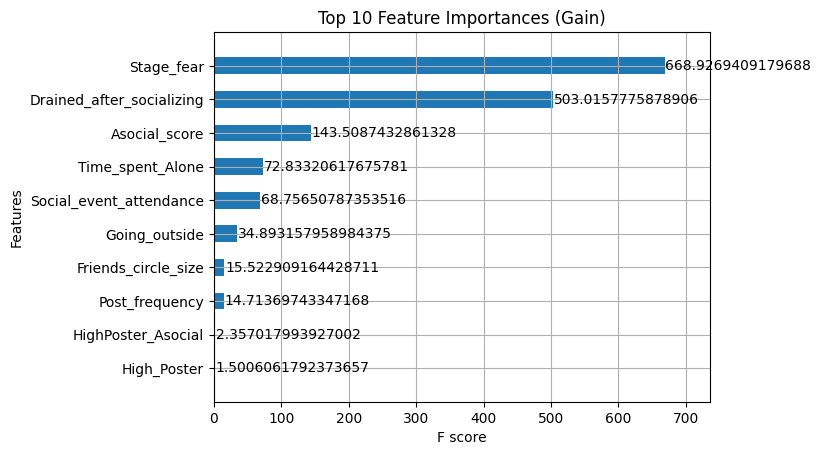

Counter({0: 13699, 1: 4825})
Model trained and predictions exported as 'XGBoostPredictionsKaggleModel1.csv'


In [ ]:
###############################################'#########################Commented out - not influencial features
# Apply binning
#TrainDataset['Post_frequency_binned'] = TrainDataset['Post_frequency'].apply(bin_post_frequency)
#TrainDataset['Circle_size_binned'] = TrainDataset['Friends_circle_size'].apply(bin_circle_size)
##################################################################################################################


# Asocial_score = more time alone, less event attendance, less going outside
TrainDataset['Asocial_score'] = (
    TrainDataset['Time_spent_Alone'] +
    (1 - TrainDataset['Social_event_attendance']) +
    (1 - TrainDataset['Going_outside'])
)

# Repeat same for test set
TestDataset['Post_frequency_binned'] = TestDataset['Post_frequency'].apply(bin_post_frequency)
TestDataset['Circle_size_binned'] = TestDataset['Friends_circle_size'].apply(bin_circle_size)

TestDataset['Asocial_score'] = (
    TestDataset['Time_spent_Alone'] +
    (1 - TestDataset['Social_event_attendance']) +
    (1 - TestDataset['Going_outside'])
)

TrainDataset['High_Poster'] = (TrainDataset['Post_frequency'] > 10).astype(int)
TestDataset['High_Poster'] = (TestDataset['Post_frequency'] > 10).astype(int)

# Add High_Poster flag - Anomoly in post frequency column
TrainDataset['HighPoster_Asocial'] = TrainDataset['High_Poster'] * TrainDataset['Asocial_score']
TestDataset['HighPoster_Asocial'] = TestDataset['High_Poster'] * TestDataset['Asocial_score']

# Drop unused or features
drop_binned = ['Post_frequency_binned', 'Circle_size_binned']
drop_cols = ['id', 'Personality', 'Personality_Label', 'Outlier_Flag']
X_train = TrainDataset.drop(columns=drop_cols)
y_train = TrainDataset['Personality']  # 1 = Introvert, 0 = Extrovert

#Drop binning - not influencial
TestDataset = TestDataset.drop(['Circle_size_binned', 'Post_frequency_binned'], axis=1)

X_test = TestDataset.drop(columns=['id'])



#Train Model
Model = XGBClassifier(
    objective='binary:logistic',
    max_depth=5,
    learning_rate=0.05,
    n_estimators=200,
    subsample=0.7,
    colsample_bytree=0.3,
    gamma=1.0,
    min_child_weight=7,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

Model.fit(X_train, y_train)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

scale_pos_weight = class_weights[1] / class_weights[0]

xgb.plot_importance(Model, importance_type='gain', max_num_features=10, height=0.5)
plt.title('Top 10 Feature Importances (Gain)')
plt.show()

# Predict
#Predictions = Model.predict(X_test)
BinaryPredictions = Model.predict(X_test)

# Map to labels
LabelPredictions = np.where(BinaryPredictions == 1, "Introvert", "Extrovert")

# Create submission file
Submission = TestDataset[['id']].copy()
Submission['Personality'] = LabelPredictions

print(Counter(y_train))

# CSV Export for Kaggle
Submission.to_csv('XGBoostPredictionsKaggleModel1.csv', index=False)

print("Model trained and predictions exported as 'XGBoostPredictionsKaggleModel1.csv'")

# XGB Model Analysis:

In [ ]:
#Creating datframe
XGBRes = pd.read_csv('/content/XGBoostPredictionsKaggleModel1.csv')
XGBRes.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


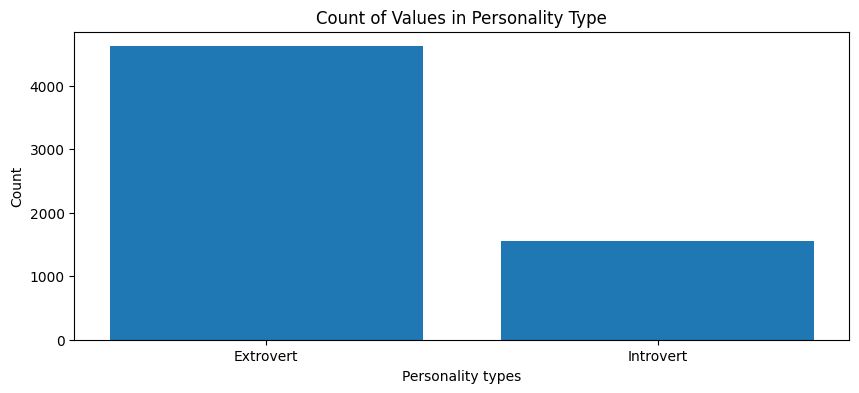

In [ ]:
#Counts of intro vs extro
CountsOfCrop = XGBRes['Personality'].value_counts()
plt.figure(figsize=(10, 4))
# Plot bar chart
plt.bar(CountsOfCrop.index, CountsOfCrop.values)
plt.xlabel('Personality types')
plt.ylabel('Count')
plt.title('Count of Values in Personality Type')

plt.show()

/tmp/ipython-input-27-2821131273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(y='id', x='Personality', data=Submission, palette=color_map, jitter=1.5)


<Axes: xlabel='Personality', ylabel='id'>

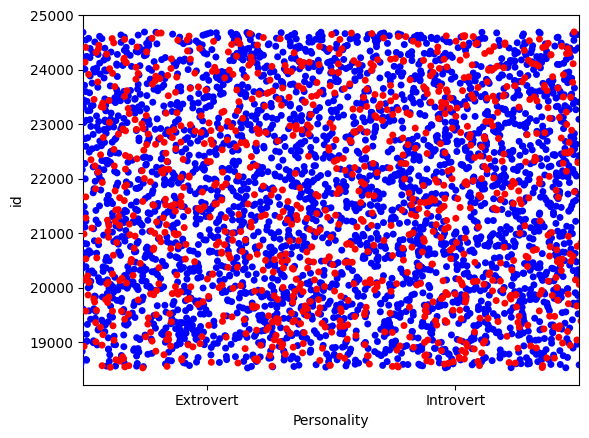

In [ ]:
color_map = {'Introvert': 'red', 'Extrovert': 'blue'}
sns.stripplot(y='id', x='Personality', data=Submission, palette=color_map, jitter=1.5)
